In [22]:
import ROOT
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os
import vector
hep.style.use("CMS")

In [5]:
input_file = "/ceph/aquiroga/Top-philic_Heavy_Resonances/Delphes/PseudoScalarSinglet/test_sample/4T_PseudoScalarSinglet_10000.root"
#input_file = "/ceph/aquiroga/HTCondor_output/Delphes_3.5.0/Signal_samples_root/SM_Starting_Point/tttt_w_minus_2l_3l_4l/Condor_Production_01/"
output_dir = "/work/aquiroga/Top_Philic_Heavy_Resonances/plots"
os.makedirs(output_dir, exist_ok=True)

df = ROOT.RDataFrame("Delphes",input_file)

df = df.Define("Jet_pt", "Jet.PT")\
    .Define("status", "Particle.Status")\
    .Define("Particle_ID", "Particle.PID")\
    .Define("Particle_pt", "Particle.PT")\
    .Define("Particle_eta", "Particle.Eta")\
    .Define("Particle_phi", "Particle.Phi")\
    .Define("Particle_px", "Particle.Px")\
    .Define("Particle_py", "Particle.Py")\
    .Define("Particle_pz", "Particle.Pz")\
    .Define("y_weight", "WeightLHEF.Weight")

In [6]:
tttt_pseudo_scalar = ak.from_rdataframe(df, ["Jet_pt", "status", "Particle_ID", "Particle_pt", "Particle_eta", "Particle_phi", "Particle_px", "Particle_py", "Particle_pz","y_weight"])

In [19]:
HT = ak.sum(tttt_pseudo_scalar["Jet_pt"], axis=1)

In [20]:
y_0p1=tttt_pseudo_scalar["y_weight"][:, 0]
y_0p5 = tttt_pseudo_scalar["y_weight"][:, 1]
y_2p0 = tttt_pseudo_scalar["y_weight"][:, 2]

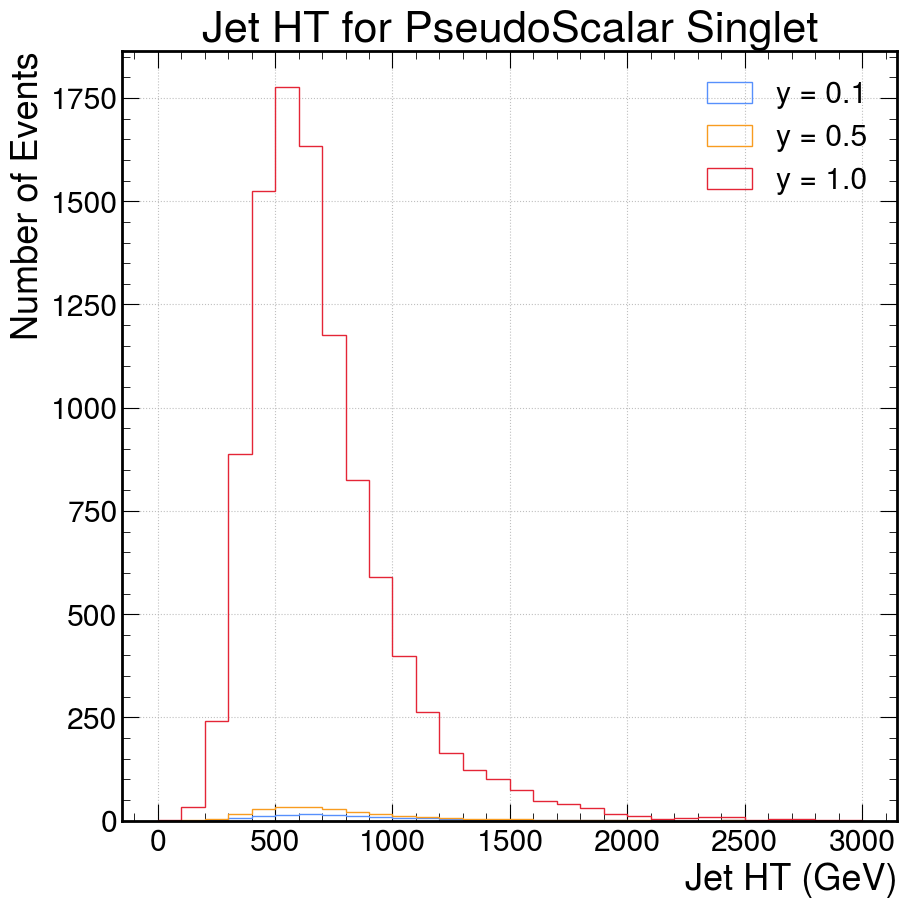

In [38]:
plt.hist(HT, bins=30, range=(0, 3000),weights= y_0p1, histtype='step', label='y = 0.1')     
plt.hist(HT, bins=30, range=(0, 3000),weights= y_0p5, histtype='step', label='y = 0.5')     
#plt.hist(HT, bins=30, range=(0, 3000),weights= y_2p0, histtype='step', label='y = 2.0')     
plt.hist(HT, bins=30, range=(0, 3000), histtype='step', label='y = 1.0')     
plt.xlabel('Jet HT (GeV)')
plt.ylabel('Number of Events')
plt.title('Jet HT for PseudoScalar Singlet')
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "Jet_HT_Distribution_PseudoScalar_Singlet.png"))


In [27]:
# Step 1: Mask all top quarks (ID == ±6)
is_top = np.abs(tttt_pseudo_scalar["Particle_ID"]) == 6

# Step 2: Mask individual fields
top_px = tttt_pseudo_scalar["Particle_px"][is_top]
top_py = tttt_pseudo_scalar["Particle_py"][is_top]
top_pz = tttt_pseudo_scalar["Particle_pz"][is_top]
top_E  = np.sqrt(top_px**2 + top_py**2 + top_pz**2 + 172.5**2)  # use mass ~172.5 GeV
top_pt = tttt_pseudo_scalar["Particle_pt"][is_top]
top_ID = tttt_pseudo_scalar["Particle_ID"][is_top]

# Step 3: Sort tops by pt
idx = ak.argsort(top_pt, axis=1, ascending=False)

sorted_px = top_px[idx]
sorted_py = top_py[idx]
sorted_pz = top_pz[idx]
sorted_E  = top_E[idx]

# Step 4: Take only the first 4 tops
top4_px = sorted_px[:, :4]
top4_py = sorted_py[:, :4]
top4_pz = sorted_pz[:, :4]
top4_E  = sorted_E[:, :4]
top4_pt = top_pt[idx][:, :4]

# Step 5: Compute HT
HT_top = ak.sum(top4_pt, axis=1)

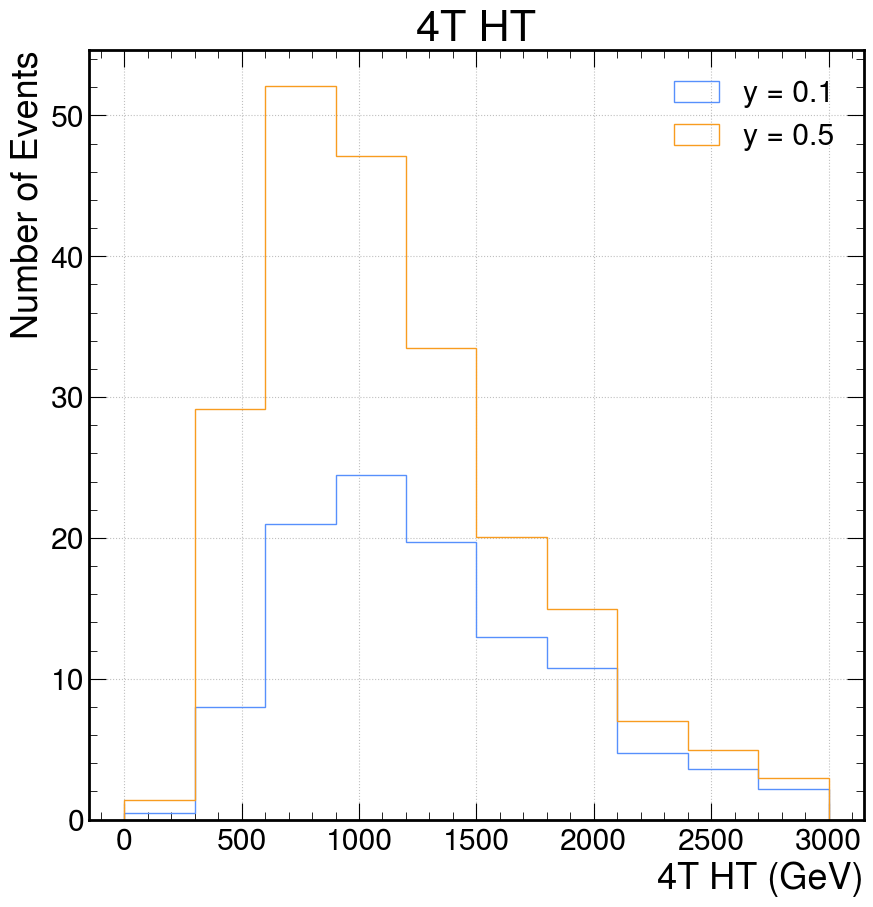

In [40]:
plt.hist(HT_top, bins=10, range=(0, 3000),weights= y_0p1, histtype='step', label='y = 0.1')     
plt.hist(HT_top, bins=10, range=(0, 3000),weights= y_0p5, histtype='step', label='y = 0.5')     
#plt.hist(HT, bins=50, range=(0, 3000),weights= y_2p0, histtype='step', label='y = 2.0')     
#plt.hist(HT_top, bins=10, range=(0, 3000), histtype='step', label='y = 1.0')     
plt.xlabel('4T HT (GeV)')
plt.ylabel('Number of Events')
plt.title("4T HT")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "4T_HT_Distribution_PseudoScalar_Singlet.png"))

In [56]:
# 1) Select top quarks per event (abs PID == 6)
is_top = np.abs(tttt_pseudo_scalar["Particle_ID"]) == 6

# Extract components for tops only
top_px = tttt_pseudo_scalar["Particle_px"][is_top]
top_py = tttt_pseudo_scalar["Particle_py"][is_top]
top_pz = tttt_pseudo_scalar["Particle_pz"][is_top]
top_pt = tttt_pseudo_scalar["Particle_pt"][is_top]

# 2) Sort tops by pt descending (per event)
idx_sorted = np.argsort(top_pt, axis=1)
top_px = top_px[idx_sorted]
top_py = top_py[idx_sorted]
top_pz = top_pz[idx_sorted]

# 3) Select first 4 tops per event
top_px4 = top_px[:, :4]
top_py4 = top_py[:, :4]
top_pz4 = top_pz[:, :4]

# 4) Calculate energy assuming top mass ~172.5 GeV
mass_top = 172.5
top_E4 = np.sqrt(top_px4**2 + top_py4**2 + top_pz4**2 + mass_top**2)

# 1) Register awkward arrays with vector (only once)
vector.register_awkward()

# 2) Prepare your four-momentum components as awkward arrays
# Make sure they have shape (n_events, 4), and are awkward arrays, not numpy arrays

# Example (assuming top_px4, top_py4, top_pz4, top_E4 are numpy arrays):
top_px4 = ak.Array(top_px4)
top_py4 = ak.Array(top_py4)
top_pz4 = ak.Array(top_pz4)
top_E4  = ak.Array(top_E4)

# 3) Create a nested awkward array of dicts for each top 4-vector
tops_4vec = ak.zip({
    "px": top_px4,
    "py": top_py4,
    "pz": top_pz4,
    "E":  top_E4,
}, with_name="Momentum4D")

# 4) Sum the four top vectors per event
four_top_system = ak.sum(tops_4vec, axis=1)

# 5) Calculate invariant mass
m_4top = four_top_system.mass


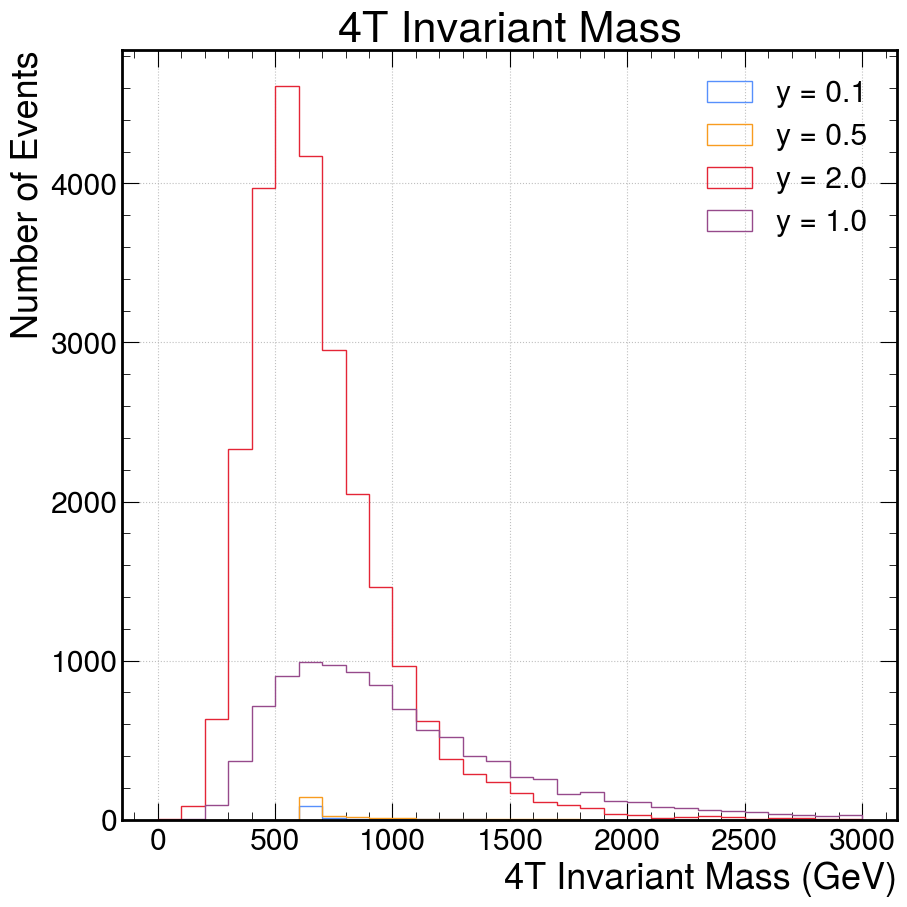

In [57]:
plt.hist(m_4top, bins=30, range=(0, 3000),weights= y_0p1, histtype='step', label='y = 0.1')     
plt.hist(m_4top, bins=30, range=(0, 3000),weights= y_0p5, histtype='step', label='y = 0.5')     
plt.hist(HT, bins=30, range=(0, 3000),weights= y_2p0, histtype='step', label='y = 2.0')     
plt.hist(HT_top, bins=30, range=(0, 3000), histtype='step', label='y = 1.0')     
plt.xlabel('4T Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.title("4T Invariant Mass")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "4T_Invariant_Distribution_PseudoScalar_Singlet.png"))